# COVID-19 

This is my new version of analyses of COVID-19.  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
import datetime
import time

# Canada

In [2]:
from src.phac import PHAC

can = PHAC()
as_of = "2020-05-09"

## Total Cases

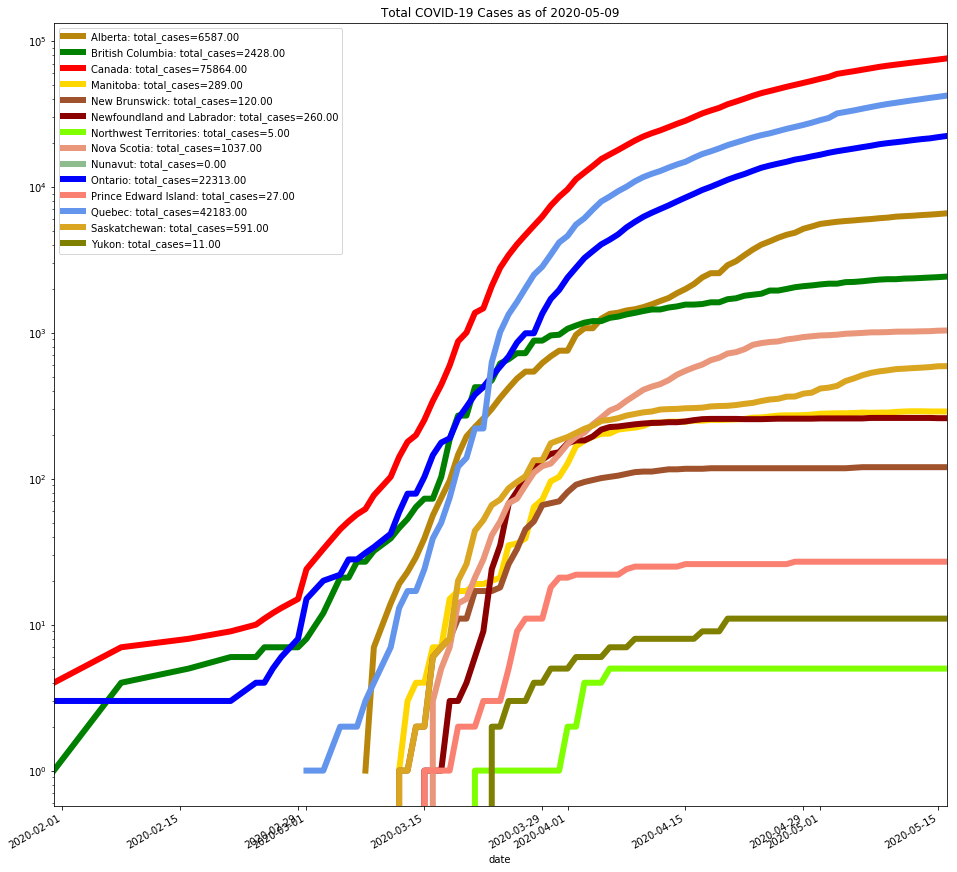

In [3]:
can_tc_fig = can.plot_var("total_cases", *can.provinces,
    figsize=(16,16),
    log_scale=True,
    colours=can.prov_colours,
    #date_start="2020-03-01",
    lw=6,
    title=f"Total COVID-19 Cases as of {as_of}"  
)


plt.show()

In [4]:
var_pivot = can.var_by_location("total_cases", *can.provinces)
var_pivot[-7:][can.provinces]

location,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
date,,,,,,,,,,,,,,
2020-05-10,68848.0,261.0,27.0,1018.0,120.0,37721.0,20238.0,287.0,564.0,6253.0,2330.0,11.0,5.0,0.0
2020-05-11,69981.0,261.0,27.0,1019.0,120.0,38469.0,20546.0,289.0,568.0,6300.0,2353.0,11.0,5.0,0.0
2020-05-12,71157.0,261.0,27.0,1020.0,120.0,39225.0,20907.0,290.0,573.0,6345.0,2360.0,11.0,5.0,0.0
2020-05-13,72278.0,261.0,27.0,1024.0,120.0,39931.0,21236.0,290.0,577.0,6407.0,2376.0,11.0,5.0,0.0
2020-05-14,73401.0,261.0,27.0,1026.0,120.0,40724.0,21494.0,289.0,582.0,6457.0,2392.0,11.0,5.0,0.0
2020-05-15,74613.0,260.0,27.0,1034.0,120.0,41420.0,21922.0,289.0,590.0,6515.0,2407.0,11.0,5.0,0.0
2020-05-16,75864.0,260.0,27.0,1037.0,120.0,42183.0,22313.0,289.0,591.0,6587.0,2428.0,11.0,5.0,0.0


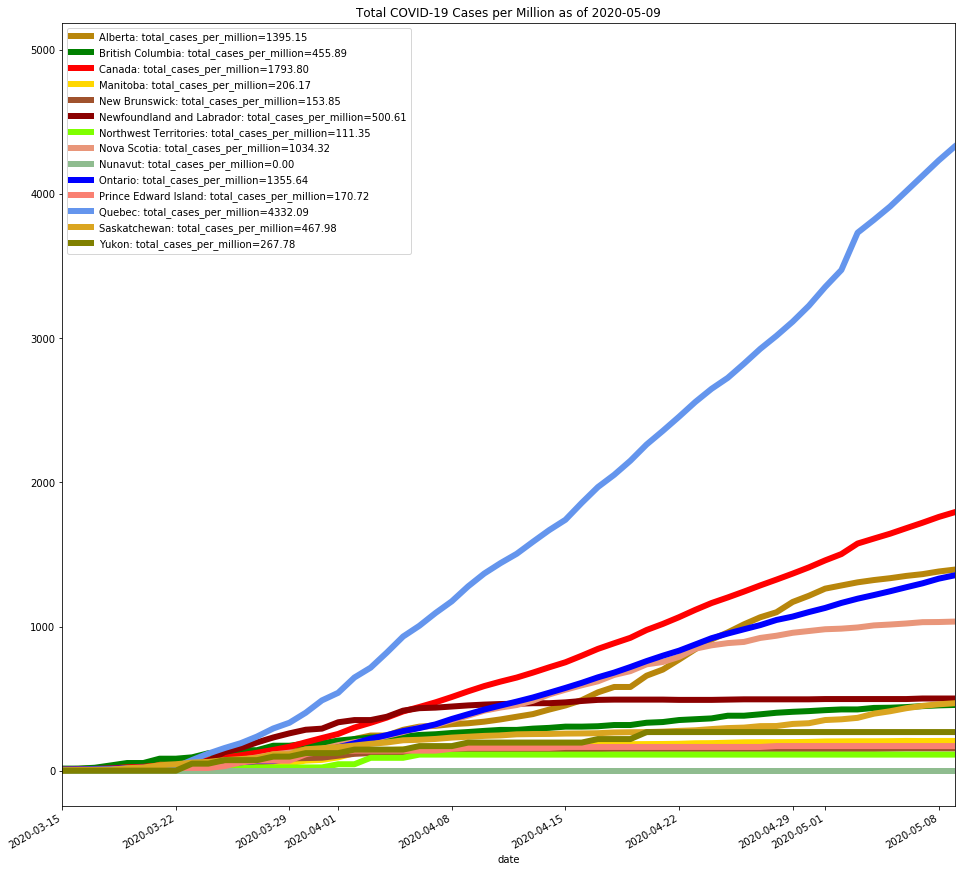

In [5]:
can_tcpm_fig = can.plot_var("total_cases_per_million", *can.provinces,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-15",
    date_end=as_of,
    lw=6,
    title=f"Total COVID-19 Cases per Million as of {as_of}"  
)


plt.show()

## New cases

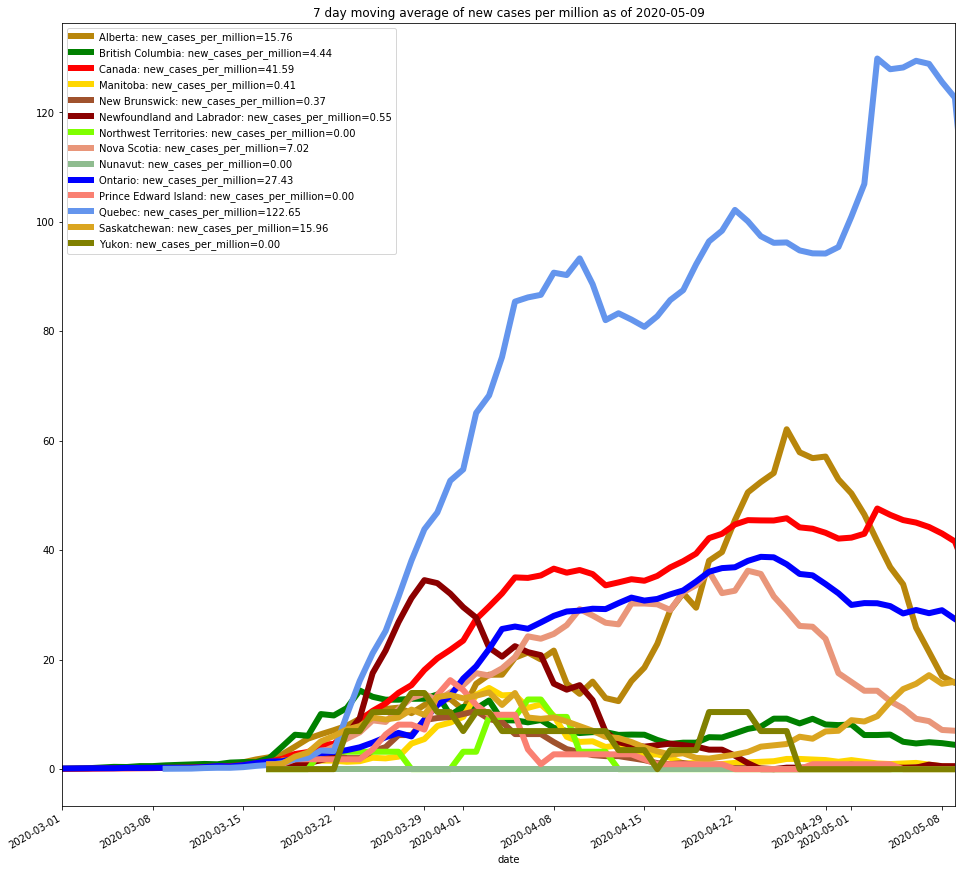

In [6]:
ma_win = 7
can_nc_fig = can.plot_var("new_cases_per_million", *can.provinces, ma_window=ma_win,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-01",
    date_end=as_of,
    lw=6,
    title=f"{ma_win} day moving average of new cases per million as of {as_of}"  
)


plt.show()

In [7]:
can_nc = can.var_by_location("new_cases", *can.provinces)
can_nc["2020-05-02":"2020-05-09"][can.provinces]

location,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
date,,,,,,,,,,,,,,
2020-05-02,1653.0,0.0,0.0,4.0,0.0,1008.0,511.0,1.0,6.0,97.0,26.0,0.0,0.0,0.0
2020-05-03,2760.0,0.0,0.0,8.0,0.0,2209.0,434.0,1.0,12.0,96.0,0.0,0.0,0.0,0.0
2020-05-04,1298.0,0.0,0.0,14.0,0.0,758.0,370.0,0.0,34.0,70.0,53.0,0.0,0.0,0.0
2020-05-05,1274.0,0.0,0.0,6.0,1.0,794.0,387.0,1.0,20.0,57.0,8.0,0.0,0.0,0.0
2020-05-06,1450.0,0.0,0.0,7.0,1.0,910.0,412.0,2.0,25.0,70.0,23.0,0.0,0.0,0.0
2020-05-07,1426.0,2.0,0.0,9.0,0.0,911.0,399.0,-1.0,19.0,54.0,33.0,0.0,0.0,0.0
2020-05-08,1512.0,0.0,0.0,1.0,0.0,912.0,477.0,1.0,13.0,81.0,27.0,0.0,0.0,0.0
2020-05-09,1268.0,0.0,0.0,3.0,0.0,836.0,346.0,0.0,9.0,59.0,15.0,0.0,0.0,0.0


## Tests

In [8]:
ma_win = 7

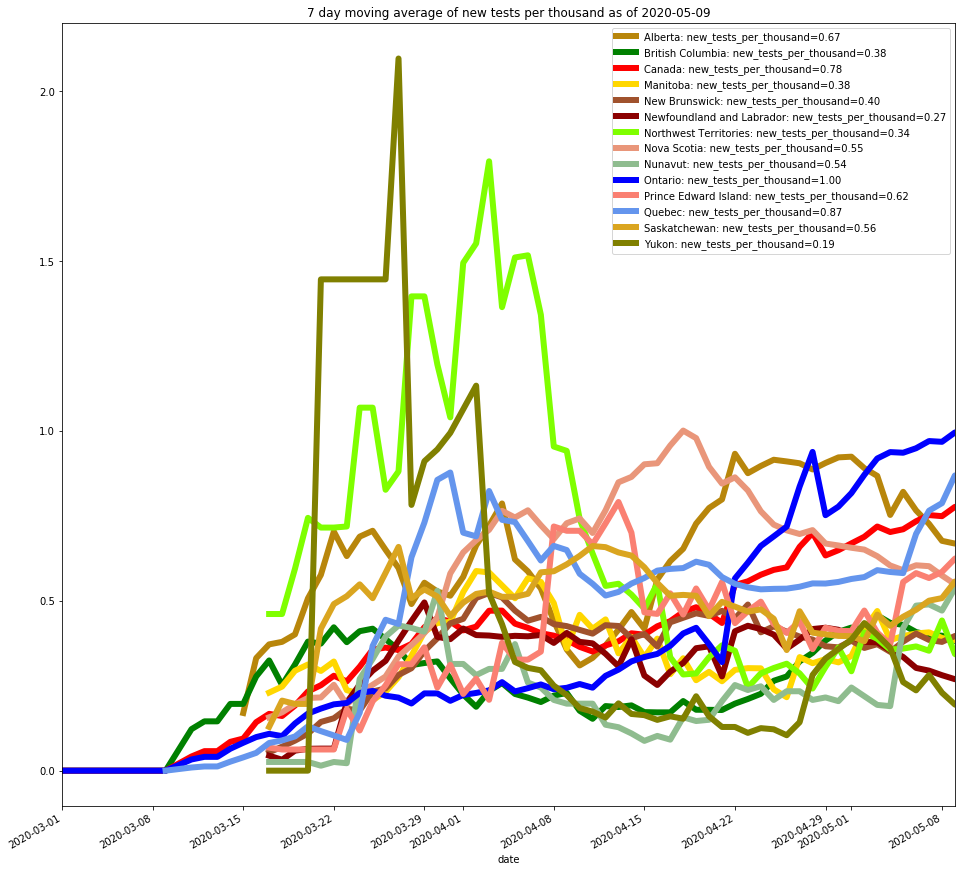

In [9]:

can_nt_fig = can.plot_var("new_tests_per_thousand", *can.provinces, ma_window=ma_win,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-01",
    date_end=as_of,
    lw=6,
    title=f"{ma_win} day moving average of new tests per thousand as of {as_of}"  
)


plt.show()

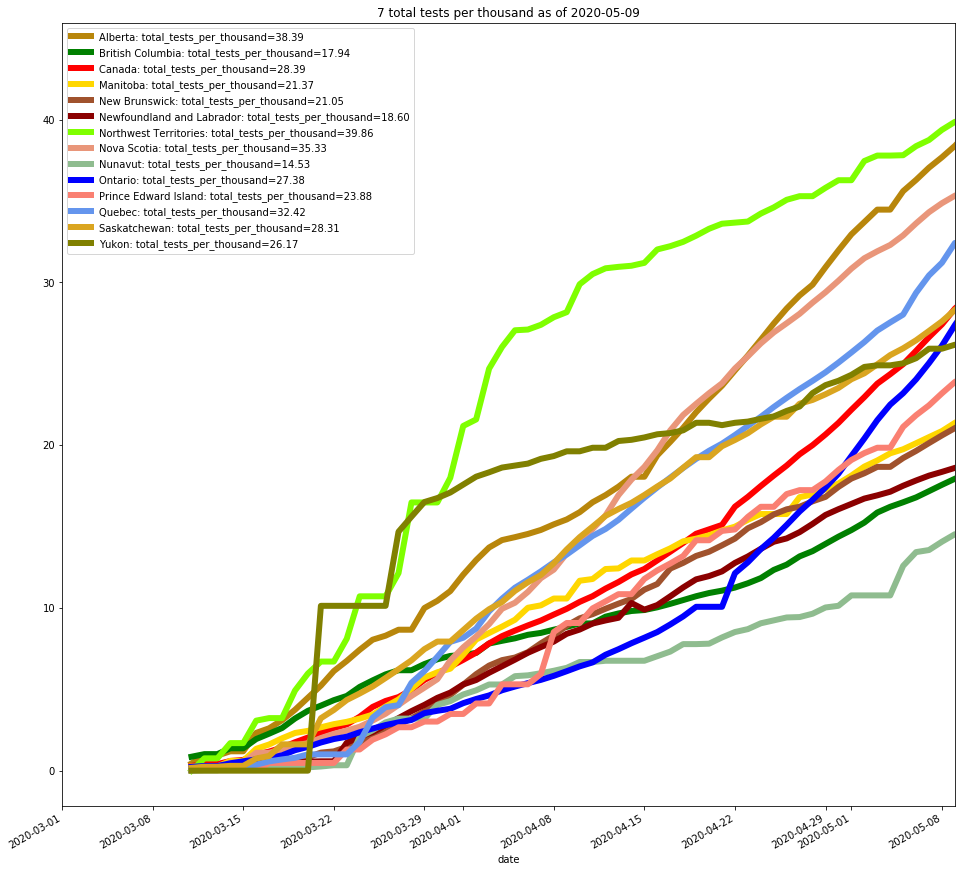

In [10]:
can_tt_fig = can.plot_var("total_tests_per_thousand", *can.provinces,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-01",
    date_end=as_of,
    lw=6,
    title=f"{ma_win} total tests per thousand as of {as_of}"  
)


plt.show()

In [11]:
can.plot_location('Canada')

AttributeError: 'PHAC' object has no attribute 'plot_location'